In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

%matplotlib inline

Read in Boston House price dataset
Source data: Kaggle
https://www.kaggle.com/c/boston-housing/data

In [226]:
os.listdir('boston-housing')

['submission_example.csv', 'test.csv', 'train.csv']

In [227]:
df = pd.read_csv('boston-housing/train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [228]:
df.shape

(333, 15)

train dataset contains 15 columns and 333 rows

# Description of all features are give below:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

## MEDV is our target variable

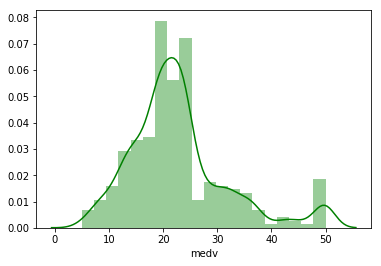

In [231]:
# Create displot 
sns.distplot(df['medv'], bins=20, color = 'green')

In [232]:
# Check null values 
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [233]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)
  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

df = remove_outlier(df,"medv")

In [234]:
df.shape

(305, 15)

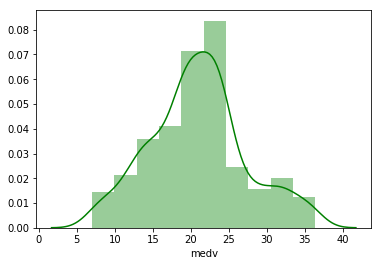

In [235]:
# Create displot 
sns.distplot(df['medv'], bins=10, color = 'green')

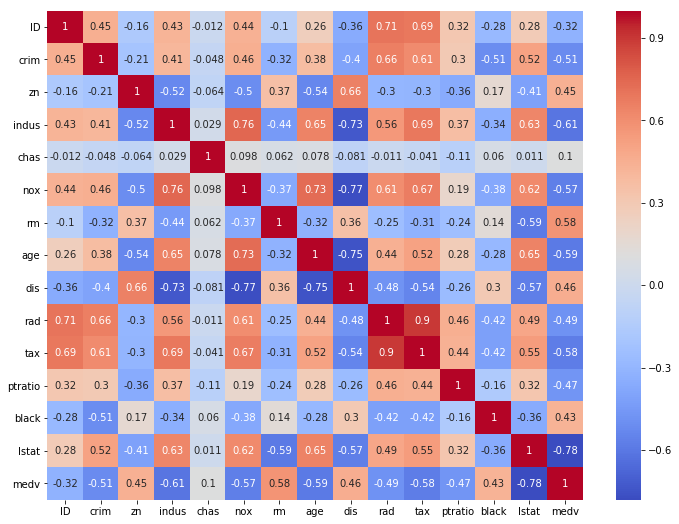

In [236]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [237]:
df.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [238]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# Linear regression using scikitlearn

In [239]:
df = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv']]

In [240]:
df.shape

(305, 14)

In [241]:
df1 = df[['rm','lstat', 'medv']]


In [242]:
df1 = df1[df1['medv']<32]

In [243]:
# Import the library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [244]:
X = df1[['rm','lstat']]

In [245]:
y = df1['medv']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [247]:
lm = LinearRegression()

In [248]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [249]:
print(lm.intercept_)

25.825522564318035


In [250]:
lm.coef_

array([ 0.38524902, -0.60118115])

In [251]:
X_train.columns

Index(['rm', 'lstat'], dtype='object')

In [252]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
cdf

,Coeff
rm,0.385249
lstat,-0.601181


# Predictions

In [253]:
predictions = lm.predict(X_test)
predictions

array([12.89346092, 17.92835205, 16.93761091, 23.57719919, 26.07671431,
       15.73976377, 26.08923299, 18.87687181, 19.15301643, 22.72775587,
       13.80696921, 21.10978498, 19.32097734, 17.209094  , 22.05594508,
       16.55837173,  9.09411167, 24.51229304, 22.01682112, 15.3673878 ,
       24.77766415, 19.58100116, 17.34281394, 14.43975622, 17.7667131 ,
       25.7022792 , 25.42127469, 23.68939336, 20.11114431, 24.8157518 ,
       17.09738525, 18.84755052, 11.59972717,  9.9445393 ,  6.81248568,
       21.12593654,  8.51998268, 18.35029607, 24.46987711, 19.41381655,
       18.47020486, 23.00578239, 25.21846609, 19.80919765, 17.43985816,
       24.95780851, 22.14849538, 23.90578967, 19.48568667, 15.94597599,
       20.14243619, 20.16281005, 21.78101982, 24.26769265, 21.10003432,
       21.89886365, 23.77281132, 23.02780902, 16.64816365, 25.55417213,
       22.30446923, 17.65316482, 21.06853826, 24.15620351, 23.10966289,
       19.29999479, 19.19638776, 23.11547436, 13.897522  , 18.53

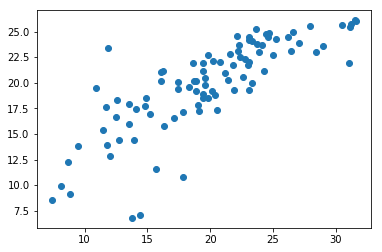

In [254]:
plt.scatter(y_test, predictions)

C:\Users\Phoenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


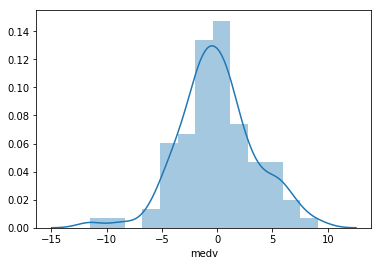

In [255]:
sns.distplot((y_test-predictions))

# Get MAE, MSE and RMSE

In [256]:
from sklearn import metrics

In [257]:
# MAE
metrics.mean_absolute_error(y_test, predictions)

2.610354829021906

In [258]:
# MSE
metrics.mean_squared_error(y_test, predictions)

11.85876764879326

In [259]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3.4436561455513033